In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
import numpy as np

# Data Exploration

Let's have a look at the data, then get some simple statistics from the data

In [272]:
# Read the sample data using pandas routines which easily handle any csv quirks.
df = pd.read_csv("ML_201609/sample.csv")
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [13]:
df.describe(include="all") # this will give a summary of the entries in the data table 

,loc1,loc2,para1,dow,para2,para3,para4,price
count,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,12,107,NaN,7,NaN,NaN,NaN,NaN
top,2,21,NaN,Wed,NaN,NaN,NaN,NaN
freq,1607,499,NaN,2233,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.380800,NaN,447.384000,9547.989920,8.459522,433.733056
std,NaN,NaN,3.500831,NaN,221.005861,8022.814037,4.613526,277.435947
min,NaN,NaN,0.000000,NaN,16.000000,200.000000,1.000000,50.730000
25%,NaN,NaN,1.000000,NaN,301.000000,2898.000000,4.000000,250.000000
50%,NaN,NaN,1.000000,NaN,434.000000,6447.000000,7.200000,370.000000
75%,NaN,NaN,1.000000,NaN,582.000000,15000.000000,13.600000,550.000000


`price` has a variation range of two orders of magnitude, the same goes for `para2` and `para3`. `para4` has a smaller range. All of these exhibhit a large standard deviation. 

`dow` contains the day of the week in a three letter format, i will now check the price fluctuations by the day of the week. 

In [14]:
grouped = df.groupby("dow") 

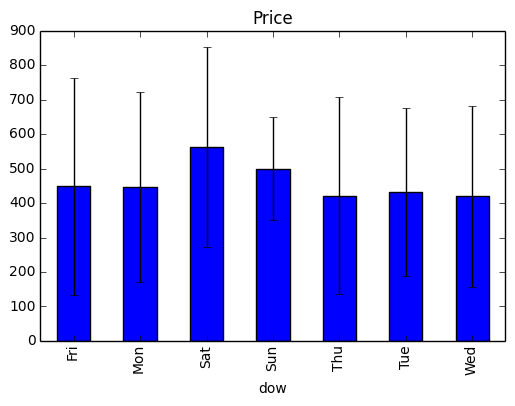

In [15]:
means = grouped.mean()
errors = grouped.std()
means.price.plot.bar(yerr=errors["price"], title="Price")

In [16]:
grouped.count().price # .price is there because we are only interested in one column.

dow
Fri    1931
Mon    1918
Sat      10
Sun       3
Thu    1908
Tue    1997
Wed    2233
Name: price, dtype: int64

`price` fluctuates slightly during the week, with a peak in the weekend. But the relative size of the sample is really small compared to the other days of the week. The standard deviations are quite large too so we can safely ingnore this fluctuation.

`loc1` and `loc2` are string values, let's inspect their values

In [17]:
df.loc1.unique()

array(['0', '9', '4', '5', '7', '8', '1', '3', '2', '6', 'S', 'T'], dtype=object)

In [18]:
df.loc2.unique()

array(['01', '99', '04', '40', '50', '03', '09', '74', '89', '17', '34',
       '30', '21', '59', '28', '64', '14', '46', '19', '15', '90', '67',
       '85', '24', '12', '20', '23', '08', '06', '95', '37', '77', '73',
       '88', '66', '39', '41', '68', '47', '33', '35', '78', '54', '76',
       '51', '79', '16', '02', '29', '57', '45', '80', '31', '70', '22',
       '27', '87', '53', '75', '38', '26', '25', '63', '86', '97', '81',
       '13', '49', '32', '72', '71', '10', '94', '96', '93', '42', '48',
       '55', '91', '58', '60', '44', '52', '05', '36', '82', '56', '84',
       '65', '07', '92', '83', '18', '69', '98', '62', '00', '61', '0B',
       'S6', '43', '0T', 'TS', '0L', '11', '0C', '0N'], dtype=object)

Now I look at the variation variation in parameters and price when grouped by `loc1`

In [19]:
grouped = df.groupby("loc1")

In [20]:
grouped.price.count()

loc1
0    1486
1    1223
2    1607
3     945
4     773
5     846
6     620
7    1081
8     727
9     690
S       1
T       1
Name: price, dtype: int64

The small number of entries attached to the non-numerical values of `loc1` makes me suspect of a data entry error.
I will now graphically check the fluctuations in price by `loc1`

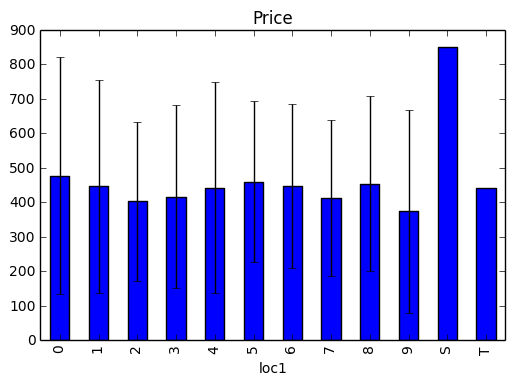

In [21]:
means = grouped.mean()
means
errors = grouped.std()
means.price.plot.bar(yerr=errors["price"], title="Price")

The variation seems small here too. Let's see if the number of entries for non-numerical values of `loc2` are small too

In [273]:
df[df.loc2.str.contains('[A-Z]')]

,loc1,loc2,para1,dow,para2,para3,para4,price
2887,0,0B,2,Mon,801,1091.0,9.0,1350.0
3026,S,S6,3,Fri,1289,24000.0,13.6,850.0
4850,0,0T,2,Mon,1473,4000.0,2.0,1890.0
5510,T,TS,3,Fri,1472,1600.0,2.0,440.0
5647,0,0L,2,Wed,1127,10000.0,13.6,750.0
7751,0,0C,3,Fri,623,1500.0,6.0,400.0
8466,0,0N,3,Fri,1298,3500.0,2.1,1500.0


Definetely got very few of those values, this reinforces my belief the it could be a data entry mistake. 
Now I will convert these to numerical values to plot them and see how they are distributed.

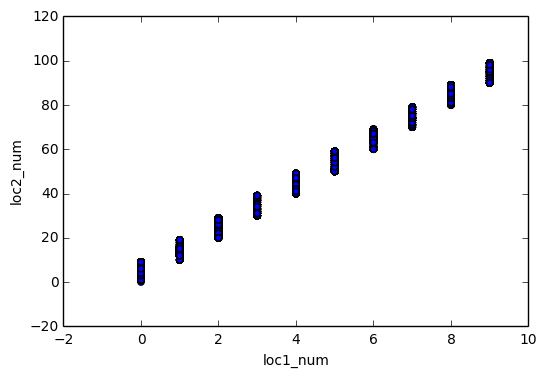

In [276]:
df['loc1_num'] = pd.to_numeric(df['loc1'],errors='coerce') # 'coerce' will give NaN if loc1 has a letter
df['loc2_num'] = pd.to_numeric(df['loc2'],errors='coerce') # 'coerce' will give NaN if loc2 has a letter
df.plot.scatter(x='loc1_num',y='loc2_num')

looks like `loc1` is redundant, it is repeated as the first character of `loc2`, the check below will tell me if this is the case

In [24]:
(df['loc1'] == df['loc2'].str[0]).all()

True

given that `loc1` is redundant let's create `loc3` from the second digit of `loc2` and check the distrubtion of price for these

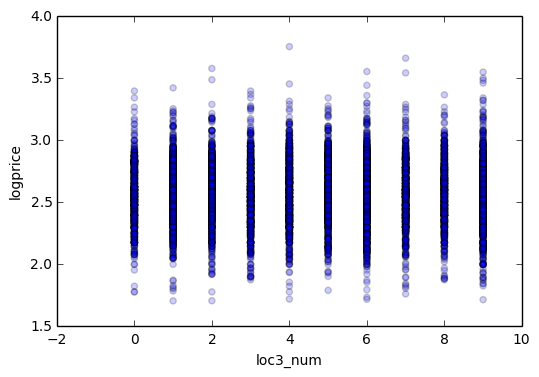

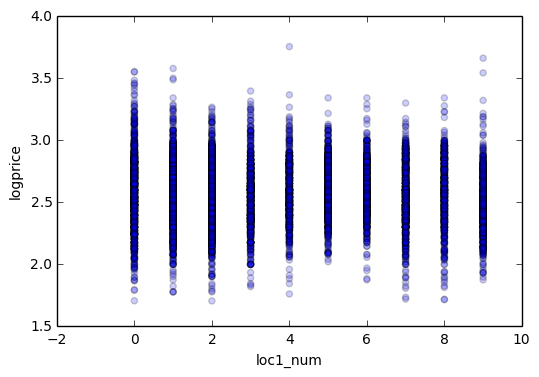

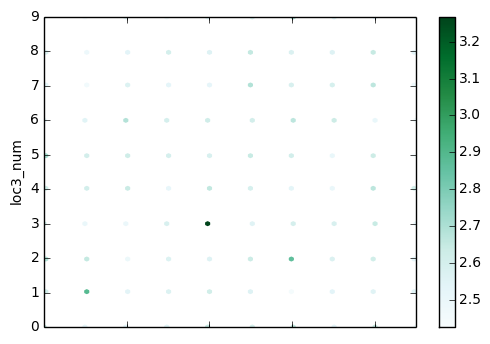

In [299]:
df['loc3'] = df['loc2'].str[1]
df['loc3_num'] = pd.to_numeric(df['loc3'],errors="coerce")
df['logprice'] = np.log10(df['price'])
df.plot.scatter(x="loc3_num",y="logprice", alpha=0.2)
df.plot.scatter(x="loc1_num",y="logprice", alpha=0.2)
df.plot(kind='hexbin', x='loc1_num', y='loc3_num' , C='logprice', reduce_C_function=np.mean)

The first two plots show the distribution of `price`s for `loc1` and `loc3`. The third plot shows how there seems to be a `price` peak for `loc2 == '43'` and two smaller peaks at `loc2 == '62'` and `loc2 == '11'`, we can check their values using a pivot table

In [278]:
pd.pivot_table(df,values='price', index='loc3', columns='loc1')

loc1,0,1,2,3,4,5,6,7,8,9,S,T
loc3,,,,,,,,,,,,
0,475.000000,451.571026,390.816667,410.610763,489.021485,452.739032,513.172258,399.759333,553.636364,331.067559,NaN,NaN
1,467.520498,815.000000,397.431383,402.756875,455.260901,398.594352,299.833000,390.555114,432.895500,391.442931,NaN,NaN
2,580.777143,509.192527,367.320265,411.574483,419.819451,518.817347,750.000000,427.674565,440.000000,379.921622,NaN,NaN
3,536.393900,393.345391,364.665488,443.086829,1850.000000,389.749070,448.485294,437.884513,507.054400,357.885333,NaN,NaN
4,511.948667,476.636707,498.723671,401.017736,596.012558,472.006400,391.581356,359.819726,541.427083,482.252571,NaN,NaN
5,619.211579,488.863214,486.458784,434.995339,440.066667,504.986393,448.110588,367.346739,510.460231,309.037757,NaN,NaN
6,447.757467,419.554458,553.151628,454.331628,492.182381,453.814091,528.011176,504.302276,382.649519,357.258000,850.0,NaN
7,394.113333,344.978214,426.578105,424.719737,377.024317,544.641600,420.537186,454.391358,505.138462,416.301818,NaN,NaN
8,435.740803,341.314167,381.756711,480.197581,442.148857,490.729298,429.944107,414.158257,508.585747,383.846000,NaN,NaN


But these peaks corrspond to very small samples as can be seen from the table below:

In [279]:
pd.pivot_table(df,values='price', index='loc3', columns='loc1', aggfunc='count') #the standard pivot table gives the mean, so aggfunc is needed.

loc1,0,1,2,3,4,5,6,7,8,9,S,T
loc3,,,,,,,,,,,,
0,1.0,39.0,168.0,118.0,101.0,217.0,31.0,45.0,11.0,127.0,NaN,NaN
1,241.0,2.0,499.0,160.0,111.0,108.0,10.0,88.0,40.0,58.0,NaN,NaN
2,63.0,273.0,226.0,87.0,91.0,49.0,5.0,46.0,9.0,37.0,NaN,NaN
3,100.0,128.0,215.0,82.0,1.0,43.0,119.0,113.0,50.0,45.0,NaN,NaN
4,180.0,246.0,79.0,53.0,43.0,50.0,59.0,329.0,24.0,35.0,NaN,NaN
5,38.0,168.0,74.0,118.0,48.0,61.0,34.0,46.0,130.0,107.0,NaN,NaN
6,454.0,166.0,43.0,43.0,42.0,44.0,68.0,123.0,104.0,35.0,1.0,NaN
7,75.0,28.0,95.0,76.0,139.0,75.0,167.0,81.0,78.0,88.0,NaN,NaN
8,137.0,24.0,149.0,62.0,70.0,57.0,112.0,109.0,87.0,25.0,NaN,NaN


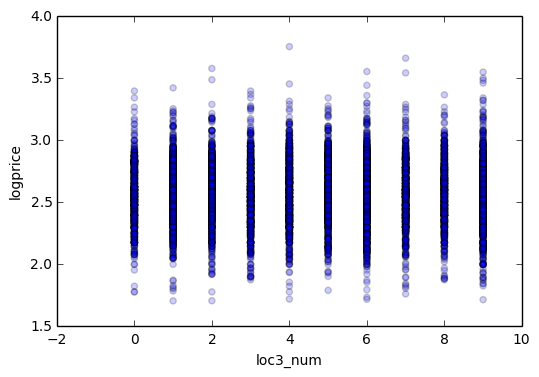

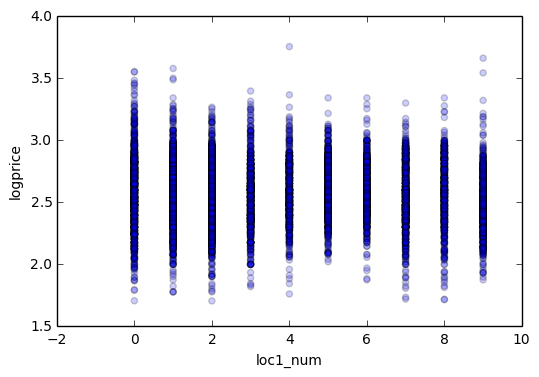

Now let's focus on the other attributes of the entries, the `para*`, of these only `para1` seemed like and integer parameter, let's look at its values

In [280]:
df['para1'].unique()

array([  1,   0,   4,   3,   2,   5,  24,   7,   6,  13,   9,   8, 337])

In [29]:
df.groupby('para1').price.count()

para1
0       836
1      7052
2       268
3      1613
4       164
5        51
6         6
7         3
8         1
9         2
13        2
24        1
337       1
Name: price, dtype: int64

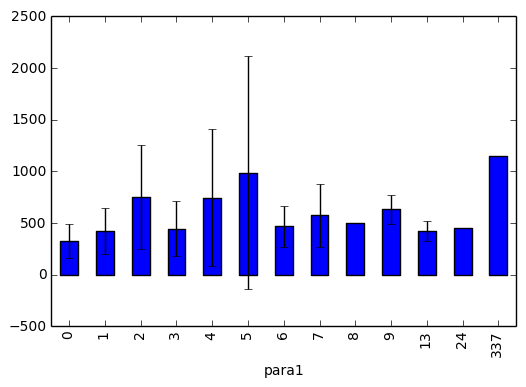

In [30]:
grouped = df.groupby('para1')
means = grouped.mean()
errors = grouped.std()
means.price.plot.bar(yerr=errors)

The mean `price` shows some interesting fluctuations with `para1`, even though the sample size becomes really small for `para1 > 5`.

Now let's look a the other parameters in a scatter matrix:

array([[<matplotlib.axes.AxesSubplot object at 0x119d81d50>,
        <matplotlib.axes.AxesSubplot object at 0x11b5f5850>]], dtype=object)

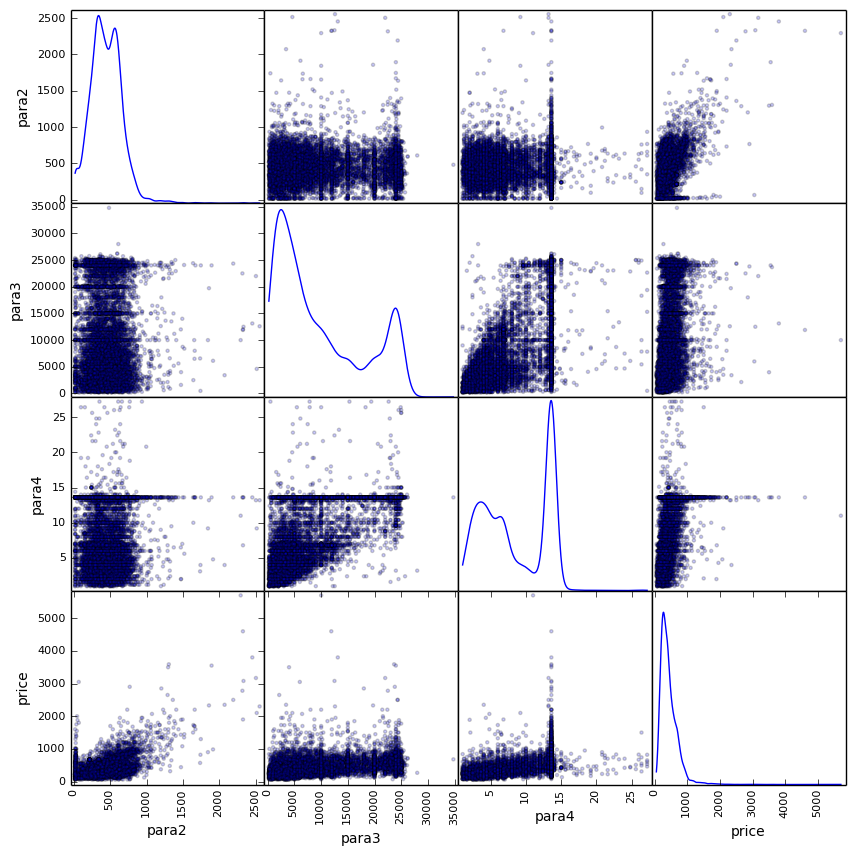

In [295]:
pd.scatter_matrix(df[['para2','para3','para4','price']], alpha=0.2, figsize=(10,10),diagonal='kde')

# Model Fitting

`price` distribution seems to be lognormal, let's fit it

In [281]:
from scipy.stats import lognorm
fit_parameters = lognorm.fit(df.price)
mean, var, skew, kurt = lognorm.stats(*fit_parameters, moments='mvsk')
print "Log-normal distribution parameters: ", mean, var, skew, kurt

Log-normal distribution parameters:  432.582883542 66858.2381743 1.99248411041 7.79946597947


In [33]:
x = np.logspace(1,np.log10(1500),50)
fit_result = lognorm.pdf(x, *fit_parameters)

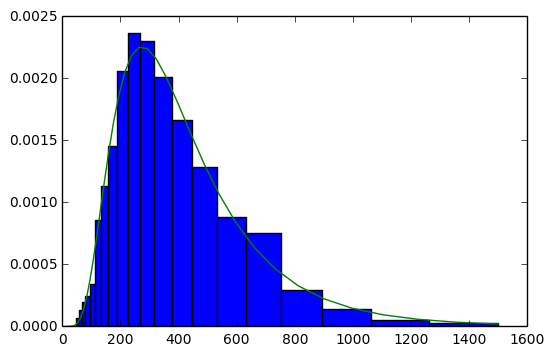

In [34]:
bins = np.logspace(1,np.log10(1500),30)
plt.hist(df.price,bins=bins,normed=1)
plt.plot(x,fit_result)


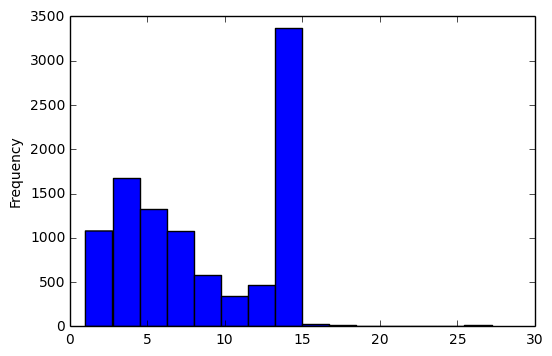

In [293]:
df['para4'].plot.hist(bins=15)

`para4` instead presents a bimodal distribution with an important peak around 14

Now I plot price as a function of the various paramers, I also check the log10 of the quantities to be sure to look at all the details

In [50]:
df['log_para2'] = np.log10(df.para2)
df['log_para3'] = np.log10(df.para3)
df['log_para4'] = np.log10(df.para4)

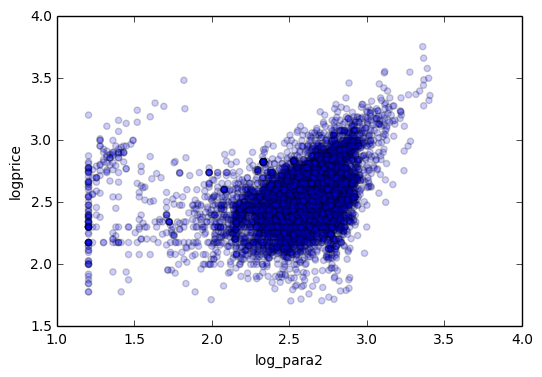

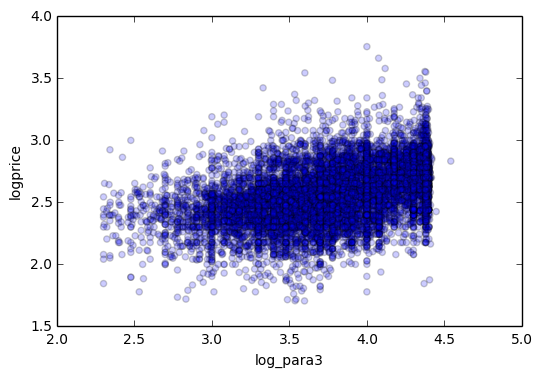

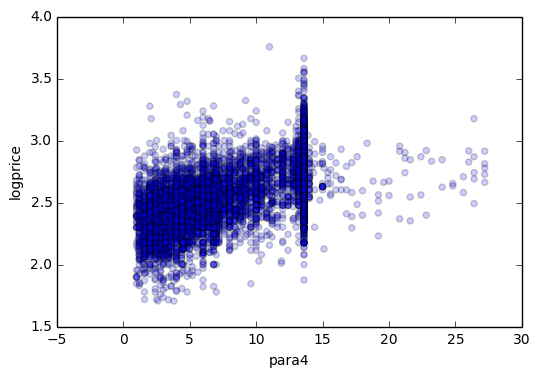

In [133]:
df.plot.scatter(x="log_para2",y="logprice", alpha=0.2)
df.plot.scatter(x="log_para3",y="logprice", alpha=0.2)
df.plot.scatter(x="para4",y="logprice", alpha=0.2)

Now I can start performing some fits, I will start with a linear fit using the `statsmodels` package to perform a least squares fit

In [52]:
import statsmodels.api as sm

In [93]:
# we perform a cut to obtain a more robust fit for the linear model,
# this cut excludes the region outside the cluster present for log_para2 > 1.9
df_cut = df[df['log_para2'] > 1.9] 
# this cut excludes the region outside the cluster present for para4 < 15
df_cut = df_cut[df_cut['para4'] < 15]

variables = df_cut[['para2','para3','para4']]
price = df_cut.logprice
variables = sm.add_constant(variables)

In [94]:
est = sm.OLS(price, variables).fit()

In [95]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     5782.
Date:                Mon, 03 Oct 2016   Prob (F-statistic):               0.00
Time:                        14:53:54   Log-Likelihood:                 5167.3
No. Observations:                9593   AIC:                        -1.033e+04
Df Residuals:                    9589   BIC:                        -1.030e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0482      0.004    475.729      0.000         2.040     2.057
para2          0.0005   6.83e-06     80.369      0.000         0.001     0.001
para3      -2.741e-07   2.54e-07     -1.079      0.281     -7.72e-07  2.24e-07
para4          0.0328      0.000     72.780      0.000         0.032     0.034
==============================================================================
Omnibus:                      672.863   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1831.016
Skew:                          -0.391   Prob(JB):                         0.00
Kurtosis:                       4.992   Cond. No.                     3.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using all the three parameters I obtain a linear fit with a good value of R-squared, the fit predicts a very small value of the coefficient for para3, so I ignore it and redo the fit:

In [131]:
variables = df_cut[['para2','para4']]
price = df_cut.logprice
variables = sm.add_constant(variables)

In [132]:
est = sm.OLS(price, variables).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     8672.
Date:                Mon, 03 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:07:02   Log-Likelihood:                 5166.7
No. Observations:                9593   AIC:                        -1.033e+04
Df Residuals:                    9590   BIC:                        -1.031e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0484      0.004    476.391      0.000         2.040     2.057
para2          0.0005   6.83e-06     80.375      0.000         0.001     0.001
para4          0.0325      0.000    101.127      0.000         0.032     0.033
==============================================================================
Omnibus:                      669.763   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1814.569
Skew:                          -0.391   Prob(JB):                         0.00
Kurtosis:                       4.982   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With just two variables we obtain a fit with a similar goodness this is due to `para4` and `para3` being correlated. 

The final result is `log10(price) = 0.005*para2 + 0.0325 * para4 + 2.0484` 

Now we perform the same task with scikit-learn. We also check our fit with a train/test split

In [149]:
from sklearn import  linear_model
from sklearn.model_selection import train_test_split


In [150]:
train, test = train_test_split(df_cut, test_size = 0.2)

In [263]:
regr = linear_model.LinearRegression()
regr.fit(train[['para2','para4']],train['logprice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [264]:
print "Coefficents: ",regr.coef_
print "Intercept: ", regr.intercept_

Coefficents:  [ 0.00051745  0.03138672]
Intercept:  2.07359337891


In [265]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(test[['para2','para4']]) - test['logprice']) ** 2))
print('Variance score: %.2f' % regr.score(test[['para2','para4']], test['logprice']))

Mean squared error: 0.02
Variance score: 0.62


Now we perform some cross validation:

In [154]:
from sklearn.model_selection import cross_val_score

In [234]:
regr2 = linear_model.LinearRegression()

scores = cross_val_score(regr2,df_cut[['para2','para4']],df_cut['logprice'], cv=10)

In [235]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.04)


The data shows a large amount of scatter around the fit so I want to try a second approach using a k-Nearest Neighbor type of regression to predict the price values, this method should respect the structure of the data a little bit more, especially the bimodalities and peaks present in the distributions.

In [213]:
from sklearn.neighbors import KNeighborsRegressor
knn_regr = KNeighborsRegressor(n_neighbors=20)

In [268]:
train, test = train_test_split(df, test_size = 0.2)
#train_X = train[['para1','para2','para3','para4']]
#test_X = test[['para1','para2','para3','para4']]
train_X = train[['para2','para4']]
test_X = test[['para2','para4']]
train_Y = train[['price']]
test_Y = test[['price']]

knn_regr.fit(train_X,train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='uniform')

In [269]:
print "Mean squared error: %.2f" % np.mean((knn_regr.predict(test_X) - test_Y) ** 2)
print 'Variance score: %.2f' % knn_regr.score(test_X, test_Y)

Mean squared error: 25653.80
Variance score: 0.65


Now I cross-validate this result

In [288]:
knn_regr2 = KNeighborsRegressor(n_neighbors=20)
scores = cross_val_score(knn_regr2,df[['para2','para4']],df['price'], cv=10)

In [289]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.07)


With this method I obtained a very similar accuracy to the linear regression method and since the dimensionality of the dataset is not too big the preformance is also very good.

A next step could be the application of some Support Vector Machine regression methods which could be used to perform novelty and outlier detection. Any method that accounts for the presence of outliers and excludes them from the data should perform slightly better.

To obtain an even better model I would revise the assumptions that led to the choice of the parameters recorded as two of them (`para3` an `para4`) seem to be correlated and `loc1` and `loc2` don't seem to have a particular influence on the price.